<a href="https://colab.research.google.com/github/andrepeersil/heart_attack_prediction/blob/main/Heart_Attack_Analysis_%26_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução

**Objetivo:**

Prever a chance de ataque no coração baseado em características do paciente

O dataset utilizado nesse projeto pode ser encontrado o [Kaggle](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/data).

São 12 características principais e nossa coluna target;





```
Age : idade do paciente
Sex : Sexo do Paciente
exang: Exercício induzido (1 = yes; 0 = no)
ca: número de vasos sanguíneos principais (0-3)
cp : Dor no peito, dos 4 tipos abaixo:
  Value 1: typical angina
  Value 2: atypical angina
  Value 3: non-anginal pain
  Value 4: asymptomatic

trtbps : resting blood pressure (in mm Hg)
chol : cholestoral in mg/dl fetched via BMI sensor
fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
rest_ecg : resting electrocardiographic results
  Value 0: normal
  Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved
target : 0= less chance of heart attack 1= more chance of heart attack
```



# Base de dados

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"andrepereeira","key":"4f1279198e09209faca290c066dd549e"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d rashikrahmanpritom/heart-attack-analysis-prediction-dataset
! unzip heart-attack-analysis-prediction-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset
License(s): CC0-1.0
heart-attack-analysis-prediction-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  heart-attack-analysis-prediction-dataset.zip
  inflating: heart.csv               
  inflating: o2Saturation.csv        


In [ ]:
import pandas as pd

df = pd.read_csv('heart.csv',)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Análise inicial da base de dados

In [38]:
#Tamanho da Base
len(df)

303

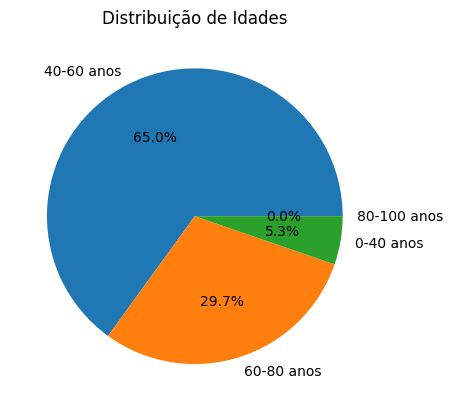

In [ ]:
import matplotlib.pyplot as plt

idades = df['age']
bins = [0,40,60,80,100]
labels = ['0-40 anos','40-60 anos','60-80 anos', '80-100 anos']
faixa_etaria = pd.cut(idades, bins=bins, labels=labels, right=False)
faixa_etaria
count_age = faixa_etaria.value_counts()
plt.pie(count_age, autopct='%1.1f%%', labels=count_age.index)
plt.title('Distribuição de Idades')
plt.show()

A maioria dos pacientes tem entre 40 e 60 anos.

In [ ]:
df

Vamos adicionar todos as colunas como features

In [ ]:
df_features = df.drop(columns=['output'])
X = df[pd.Series(df_features.columns)]
y = df['output']


Vamos separar 70% dos dados para treino e 30% para teste.
O critério para a árvore de decisão será testado para Gini e Entropy, para verificar qual traz melhores resultados.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)

clf_gini.fit(X_train, y_train)
clf_entropy.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
y_pred_gini = clf_gini.predict(X_test)
y_pred_entropy = clf_entropy.predict(X_test)


In [37]:
from sklearn.metrics import accuracy_score

print("Acurácia Gini:", f"{round(accuracy_score(y_test, y_pred_gini)*100,2)} %.")
print("Acurácia Entropy:", f"{round(accuracy_score(y_test, y_pred_entropy)*100,2)} %.")

Acurácia Gini: 73.63 %.
Acurácia Entropy: 69.23 %.


Método Gini tem uma acurácia maior